### Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
n = 100

# generate dataset
X = np.linspace(-3, 3, num=n)
print(X)
#Y = np.log(np.abs(X ** 2 - 1) + .5)
Y = np.sin(X)

# jitter X
X += np.random.normal(scale=.1, size=n)
print(X)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

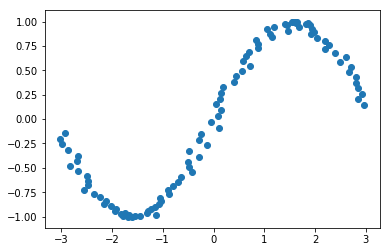

In [4]:
plt.scatter(X, Y)

In [5]:
def local_regression(x0, X, Y, tau):
    # add bias term
    x0 = np.r_[1, x0]
    X = np.c_[np.ones(len(X)), X]
    
    # fit model: normal equations with kernel
    xw = X.T * radial_kernel(x0, X, tau)
    beta = np.linalg.pinv(xw @ X) @ xw @ Y
    
    # predict value
    return (x0 @ beta)

def radial_kernel(x0, X, tau):
    return (np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau)))

In [20]:
def plot_lwr(tau):
    # prediction
    domain = np.linspace(-3, 3, num=3)
    print(domain)
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plt.scatter(X, Y, alpha=.1)
    plt.plot(domain, prediction, color='red')
    
    return plt

[-3.  0.  3.]


<module 'matplotlib.pyplot' from 'c:\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

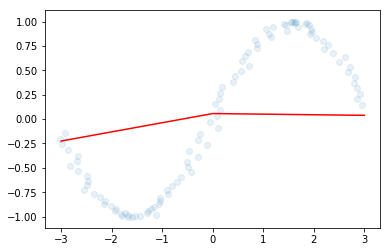

In [21]:
plot_lwr(0.03)